# Example Graphs

## Metric 1 Death Count

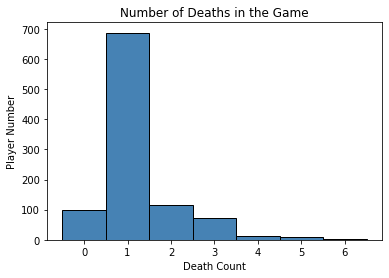

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('data.csv') 

plt.hist(x=data.death_count,bins=np.arange(7+1)-0.5,
        color="steelblue",
        edgecolor="black")

plt.xlabel("Death Count")
plt.ylabel("Player Number")

plt.title("Number of Deaths in the Game")
plt.savefig('./death_count.png', format='png')
plt.show()


## Metric 2 Playing Time

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
game_hours=get_truncated_normal(1,1,0,3).rvs(1000)
data['game_hours']=game_hours


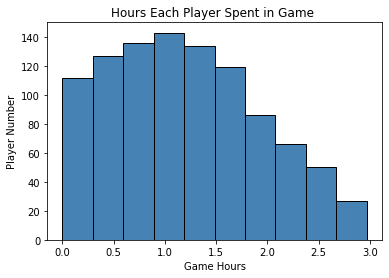

In [ ]:
plt.hist(x=data.game_hours,bins=10,
        color="steelblue",
        edgecolor="black")

plt.xlabel("Game Hours")
plt.ylabel("Player Number")

plt.title("Hours Each Player Spent in Game ")
plt.savefig('./game_hours.png', format='png')
plt.show()


#Metric 3 Plant Used

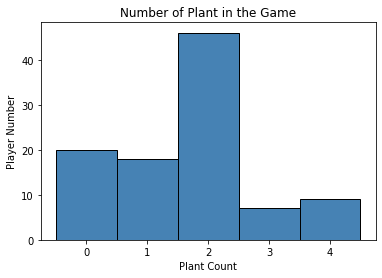

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('data.csv') 

plt.hist(x=data.plant_count,bins=np.arange(5+1)-0.5,
        color="steelblue",
        edgecolor="black")

plt.xlabel("Plant Count")
plt.ylabel("Player Number")

plt.title("Number of Plant in the Game")
plt.savefig('./plant_count.png', format='png')
plt.show()


#Metric 4 Combo Used

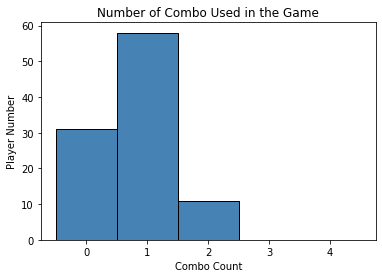

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('data.csv') 

plt.hist(x=data.combo_used,bins=np.arange(5+1)-0.5,
        color="steelblue",
        edgecolor="black")

plt.xlabel("Combo Count")
plt.ylabel("Player Number")

plt.title("Number of Combo Used in the Game")
plt.savefig('./combo_count.png', format='png')
plt.show()


# Real Data

## Connecting Database

In [2]:
!pip install pyrebase
#pull data from database
import pyrebase
import pandas as pd
# Configure your Firebase project
config = {
  "apiKey": "YOUR_API_KEY",
  "authDomain": "lostsheeps-26b16.firebaseapp.com",
  "databaseURL": "https://lostsheeps-26b16-default-rtdb.firebaseio.com/",
  "storageBucket": "lostsheeps-26b16.appspot.com"
}

# Initialize the Pyrebase app
firebase = pyrebase.initialize_app(config)

# Get a reference to the database
db = firebase.database()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Metric 1 Death Count

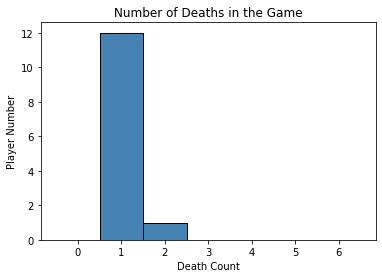

In [ ]:


# Retrieve data from the database
data = db.child("deathData").get()

# Print the retrieved data
death_data=data.val()

df = pd.DataFrame(death_data)
df=df.T
user_death_frequency=df.groupby('userID').size().tolist()
import matplotlib.pyplot as plt
import numpy as np
plt.hist(x=user_death_frequency,bins=np.arange(7+1)-0.5,
        color="steelblue",
        edgecolor="black")

plt.xlabel("Death Count")
plt.ylabel("Player Number")

plt.title("Number of Deaths in the Game")
plt.savefig('./death_count.png', format='png')

plt.show()

## Metric 2 Playing Time

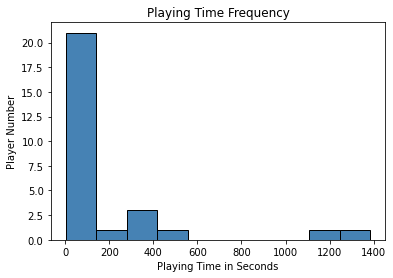

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
def strtodate(x):
  return datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
def datetosec(x):
  return x.total_seconds()
# Retrieve data from the database
data = db.child("playTime").get()

# Print the retrieved data
death_data=data.val()

df = pd.DataFrame(death_data)
df=df.T

df['playingTime']=df['end'].apply(strtodate)-df['start'].apply(strtodate)
df['playingTime']=df['playingTime'].apply(datetosec)
user_playingtime_frequency=df['playingTime'].tolist()

import matplotlib.pyplot as plt
import numpy as np
plt.hist(x=user_playingtime_frequency,bins=10,
        color="steelblue",
        edgecolor="black")

plt.xlabel("Playing Time in Seconds")
plt.ylabel("Player Number")

plt.title("Playing Time Frequency")
plt.savefig('./playing_time.png', format='png')
plt.show()

## Metric 1 (New) Death VS Time

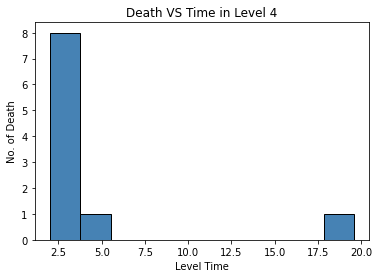

In [ ]:

# Retrieve data from the database
data = db.child("deathData").get()

# Print the retrieved data
death_data=data.val()

df = pd.DataFrame(death_data)
df=df.T
df=df[df['level']=="4"]
def process(x):
  a=float(x)
  a=round(a,1)
  return a
df['Time']=df['levelTime'].apply(process)

import matplotlib.pyplot as plt
import numpy as np
plt.hist(x=df['Time'],
        color="steelblue",
        edgecolor="black")

plt.xlabel("Level Time")
plt.ylabel("No. of Death")

plt.title("Death VS Time in Level 4")
plt.savefig('./playing_time.png', format='png')
plt.show()

## Metric 2 (New) Fail/Success Rates

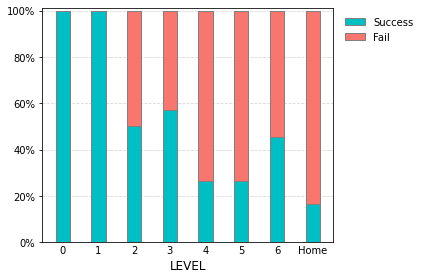

In [138]:
data = db.child("playTime").get()

# Print the retrieved data
plant_data=data.val()

df = pd.DataFrame(plant_data)
df=df.T

def is_fail(x):
  if x=="Fail":
    return 1
  return 0

def is_success(x):
  if x=="Success":
    return 1
  return 0
df['is_success']=df['status'].apply(is_success)
df['is_fail']=df['status'].apply(is_fail)

df1=df[['level','is_fail']].groupby('level').sum()
df2=df[['level','is_success']].groupby('level').sum()
df=df1.join(df2)
df=df.reset_index(drop=False)



x = df['level']

y1 = df['is_success']/(df['is_fail']+df['is_success'])
y2 = df['is_fail']/(df['is_fail']+df['is_success'])

plt.bar(x,y1,width=0.4,label='Success',color='#00bfc4',edgecolor='grey',zorder=5)
plt.bar(x,y2,width=0.4,bottom=y1,label='Fail',color='#f9766e',edgecolor='grey',zorder=5)
plt.tick_params(axis='x',length=0)
plt.xlabel('LEVEL',fontsize=12)

plt.ylim(0,1.01)
plt.yticks(np.arange(0,1.2,0.2),[f'{i}%' for i in range(0,120,20)])
plt.grid(axis='y',alpha=0.5,ls='--')

plt.legend(frameon=False,bbox_to_anchor=(1.01,1))
plt.tight_layout()
plt.savefig('SuccessRates.png', dpi=600)
plt.show()

## Metric 3 plantCount

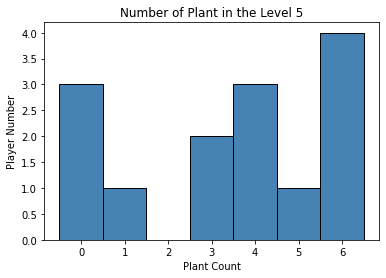

In [108]:
#may need revise for recordID and userID
data = db.child("plantData").get()

# Print the retrieved data
plant_data=data.val()

df = pd.DataFrame(plant_data)
df=df.T
df=df.loc[df["level"]=="5"]


data = db.child("playTime").get()

# Print the retrieved data
plant_data=data.val()

df2 = pd.DataFrame(plant_data)
df2=df2.T
df2=df2.loc[df2['level']=="5"]

df3=df2.merge(df, on=('userID'), how='left')
df3=df3.groupby('userID').count()
df3['plantCount']=df3['plantName']
df3=df3.reset_index(drop=False)
df3=df3[['userID','plantCount']]

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.hist(x=df3['plantCount'],bins=np.arange(0,df3['plantCount'].max()+1)-0.5,
        color="steelblue",
        edgecolor="black")

plt.xlabel("Plant Count")
plt.ylabel("Player Number")

plt.title("Number of Plant in the Level 5")
plt.savefig('./plant_count.png', format='png')
plt.show()

## Metric 4

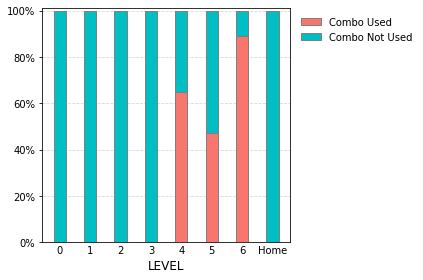

In [109]:
data = db.child("comboData").get()

# Print the retrieved data
plant_data=data.val()

df1 = pd.DataFrame(plant_data)
df1=df1.T

data = db.child("playTime").get()

# Print the retrieved data
plant_data=data.val()

df2 = pd.DataFrame(plant_data)
df2=df2.T

data=df2.merge(df1, on=('userID','level'), how='left')
data=data.groupby(['level']).count()
data['Combo']=data['comboName']
data['NoCombo']=data['userID']-data['comboName']
data=data[['Combo','NoCombo']]
data=data.reset_index(drop=False)

x = data['level']

y1 = data['Combo']/(data['NoCombo']+data['Combo'])
y2 = data['NoCombo']/(data['NoCombo']+data['Combo'])

plt.bar(x,y1,width=0.4,label='Combo Used',color='#f9766e',edgecolor='grey',zorder=5)
plt.bar(x,y2,width=0.4,bottom=y1,label='Combo Not Used',color='#00bfc4',edgecolor='grey',zorder=5)
plt.tick_params(axis='x',length=0)
plt.xlabel('LEVEL',fontsize=12)

plt.ylim(0,1.01)
plt.yticks(np.arange(0,1.2,0.2),[f'{i}%' for i in range(0,120,20)])
plt.grid(axis='y',alpha=0.5,ls='--')

plt.legend(frameon=False,bbox_to_anchor=(1.01,1))
plt.tight_layout()
plt.savefig('comboUsed.png', dpi=600)
plt.show()

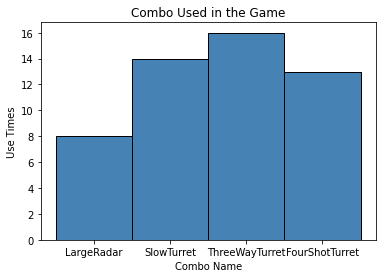

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.hist(x=df.comboName,bins=np.arange(4+1)-0.5,
        color="steelblue",
        edgecolor="black")

plt.xlabel("Combo Name")
plt.ylabel("Use Times")

plt.title("Combo Used in the Game")
plt.savefig('./combo_count.png', format='png')
plt.show()
